<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [0]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'CS231N/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

In [1]:
# !git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
!git clone https://github.com/michaele77/CS231N-pytorch

Cloning into 'CS231N-pytorch'...
remote: Enumerating objects: 2858, done.
remote: Total 2858 (delta 0), reused 0 (delta 0), pack-reused 2858
Receiving objects: 100% (2858/2858), 74.67 MiB | 21.41 MiB/s, done.
Resolving deltas: 100% (1458/1458), done.


In [0]:

import os
# os.chdir('pytorch-CycleGAN-and-pix2pix/')
os.chdir('CS231N-pytorch/')

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 18.5MB/s 
     |████████████████████████████████| 204kB 29.1MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=918bd9dd9ddf70773af99bd8dbd65975baae9ef1b4d40249fa0151df73ab5998
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=b09c979366d1825fe6d2ea993e6064e9deb3d36e01285b21826f570d4be17b31
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [0]:
# !bash ./datasets/download_pix2pix_dataset.sh facades

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [0]:
# !bash ./scripts/download_pix2pix_model.sh facades_label2photo

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [6]:
#Run the combination script
!python datasets/combine_A_and_B.py --fold_A path/to/data/A --fold_B path/to/data/B --fold_AB path/to/data

[fold_A] =  path/to/data/A
[fold_B] =  path/to/data/B
[fold_AB] =  path/to/data
[num_imgs] =  1000000
[use_AB] =  False
split = val, use 50/50 images
split = val, number of images = 50
split = train, use 200/200 images
split = train, number of images = 200
split = test, use 50/50 images
split = test, number of images = 50


In [7]:
# !python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA

#Script for GPUs
!python train.py --dataroot ./path/to/data/ --name greyGoal_1 --model pix2pix --batch_size=8 --direction AtoB --n_epochs=10 --print_freq=8

#Script for CPU only (local testing)
# !python train.py --dataroot ./path/to/data/ --name greyGoal_1 --model pix2pix --batch_size=8 --direction AtoB --n_epochs=500 --print_freq=1 --gpu_ids=-1



----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./path/to/data/               	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [9]:
!ls checkpoints/greyGoal_1


10_net_D.pth  20_net_G.pth  35_net_D.pth  45_net_G.pth	    loss_log.txt
10_net_G.pth  25_net_D.pth  35_net_G.pth  5_net_D.pth	    train_opt.txt
15_net_D.pth  25_net_G.pth  40_net_D.pth  5_net_G.pth	    web
15_net_G.pth  30_net_D.pth  40_net_G.pth  latest_net_D.pth
20_net_D.pth  30_net_G.pth  45_net_D.pth  latest_net_G.pth


In [10]:
!python test.py --dataroot ./path/to/data/ --name greyGoal_1 --model pix2pix --batch_size=8 --direction AtoB 


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 8                             	[default: 1]
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./path/to/data/               	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0               

In [20]:
!ls results/greyGoal_1/test_latest/images/

25986_fake_B.png  27972_real_B.png  29984_real_A.png  31296_fake_B.png
25986_real_A.png  27982_fake_B.png  29984_real_B.png  31296_real_A.png
25986_real_B.png  27982_real_A.png  30213_fake_B.png  31296_real_B.png
26204_fake_B.png  27982_real_B.png  30213_real_A.png  31322_fake_B.png
26204_real_A.png  28285_fake_B.png  30213_real_B.png  31322_real_A.png
26204_real_B.png  28285_real_A.png  30494_fake_B.png  31322_real_B.png
26465_fake_B.png  28285_real_B.png  30494_real_A.png  31620_fake_B.png
26465_real_A.png  28449_fake_B.png  30494_real_B.png  31620_real_A.png
26465_real_B.png  28449_real_A.png  30504_fake_B.png  31620_real_B.png
26564_fake_B.png  28449_real_B.png  30504_real_A.png  31735_fake_B.png
26564_real_A.png  28452_fake_B.png  30504_real_B.png  31735_real_A.png
26564_real_B.png  28452_real_A.png  30675_fake_B.png  31735_real_B.png
26690_fake_B.png  28452_real_B.png  30675_real_A.png  31749_fake_B.png
26690_real_A.png  28809_fake_B.png  30675_real_B.png  31749_real_A.png
26690_

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [32]:
#Try and save some of the created images to the directory:
testDir = 'results/greyGoal_1/test_latest/images/25986_fake_B.png'
!ls
!ls ..

import cv2
a = cv2.imread(testDir)
print(a.shape)
cv2.imwrite('/content/drive/My Drive/CS231N/testIm2.jpg', a)

checkpoints	docs		 models		README.md	  test.py
CycleGAN.ipynb	environment.yml  options	requirements.txt  train.py
data		imgs		 path		results		  util
datasets	LICENSE		 pix2pix.ipynb	scripts
CS231N-pytorch	drive  sample_data
(256, 256, 3)


True

# Visualize

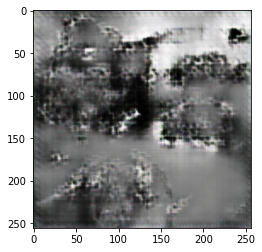

In [16]:
import matplotlib.pyplot as plt

img = plt.imread('results/greyGoal_1/test_latest/images/25986_fake_B.png')
plt.imshow(img)



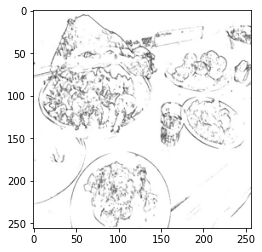

In [17]:
img = plt.imread('results/greyGoal_1/test_latest/images/25986_real_A.png')
plt.imshow(img)

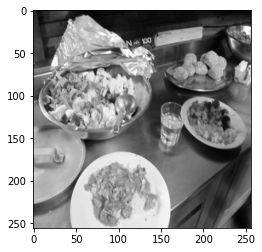

In [18]:
img = plt.imread('results/greyGoal_1/test_latest/images/25986_real_B.png')
plt.imshow(img)